## ML _Classification_

In [1]:
#import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [2]:
#load the data set
data=pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [8]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
data.shape

(918, 12)

In [10]:
data.size

11016

# Exploratory data Analysis
Univariate Analysis



In [11]:
data_N= data.select_dtypes(include=np.number)

In [12]:
data_N

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [13]:
data_C= data.select_dtypes(exclude=np.number)

In [14]:
data_C

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


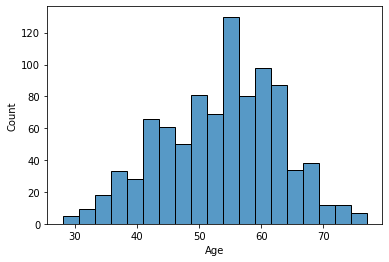

In [15]:
#histogram for Numerical columns
sns.histplot(data=data['Age'])
plt.show()

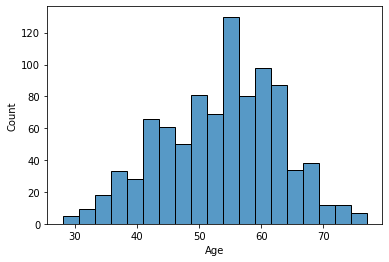

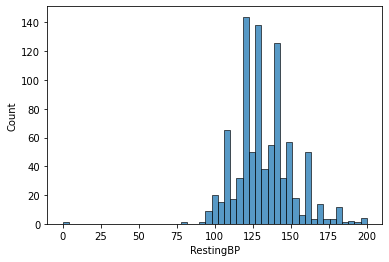

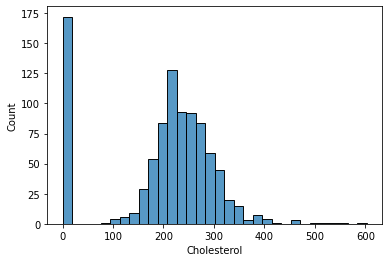

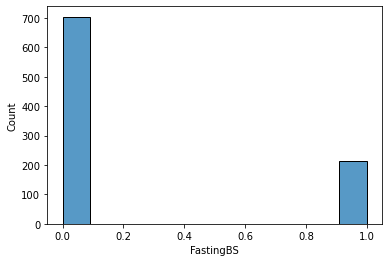

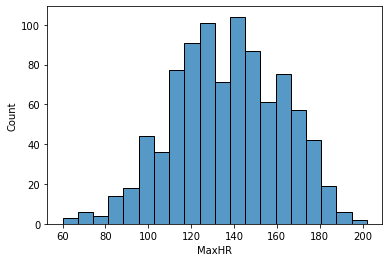

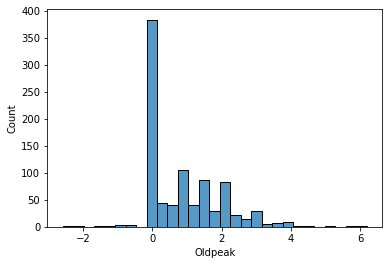

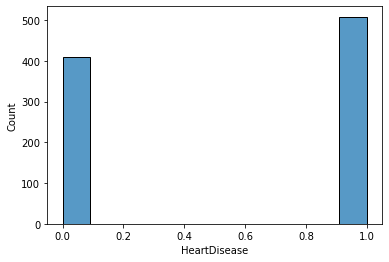

In [16]:
for i in data_N.columns:
    sns.histplot(x=data_N[i])
    plt.show()


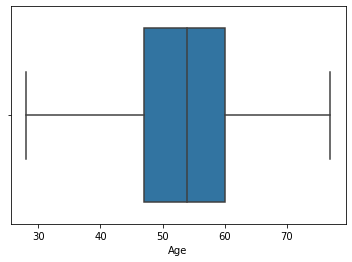

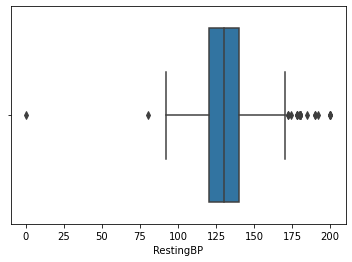

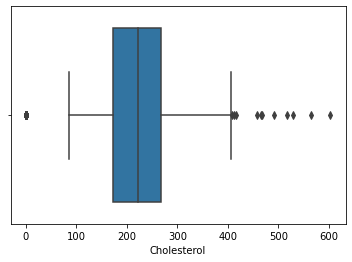

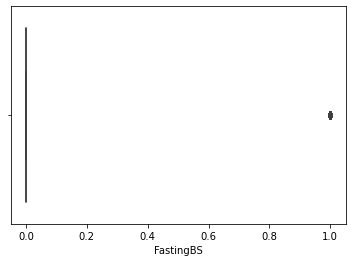

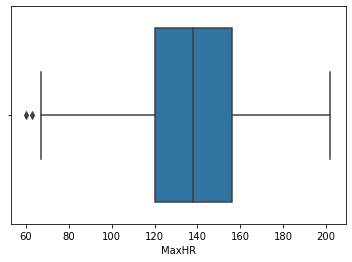

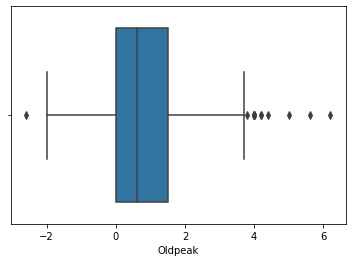

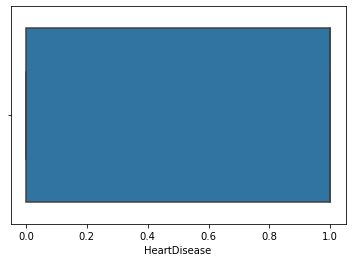

In [17]:
for j in data_N.columns:
    sns.boxplot(x=data_N[j])
    plt.show()

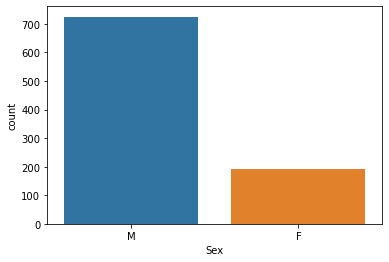

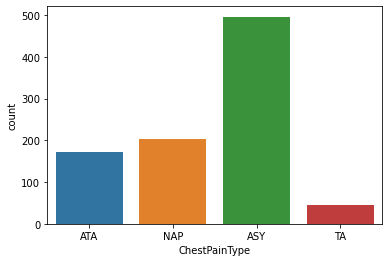

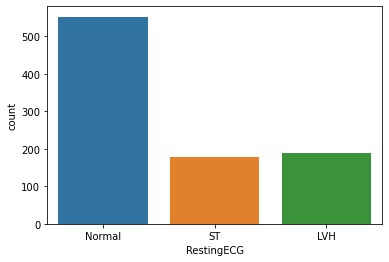

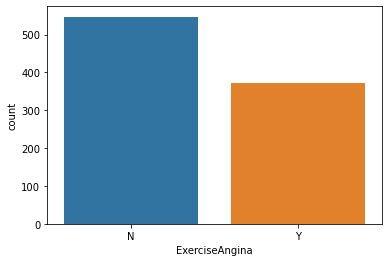

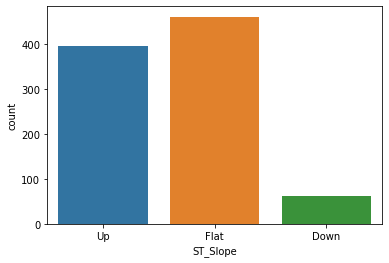

In [18]:
for i in data_C.columns:
    sns.countplot(x=data_C[i])
    plt.show()

# Bivariate Analysis


In [19]:
data_N

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


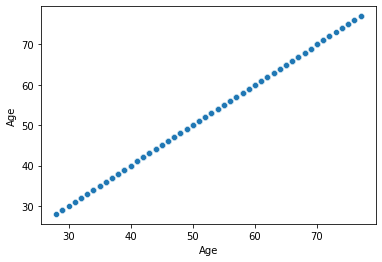

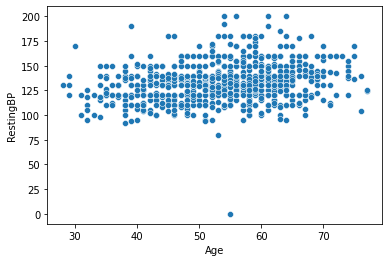

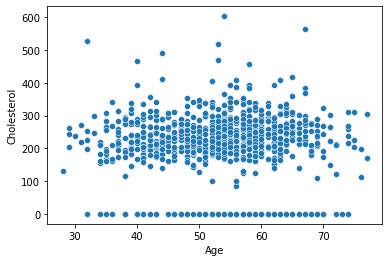

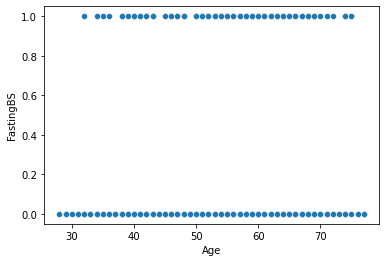

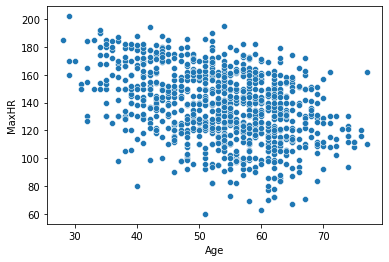

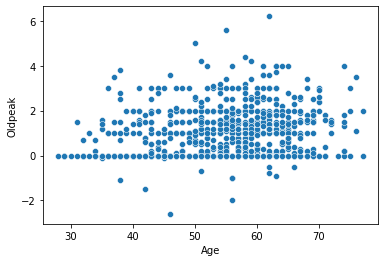

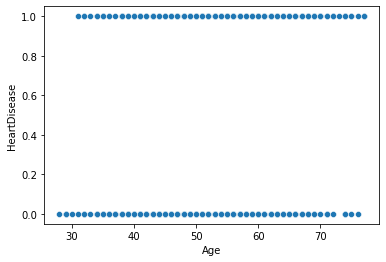

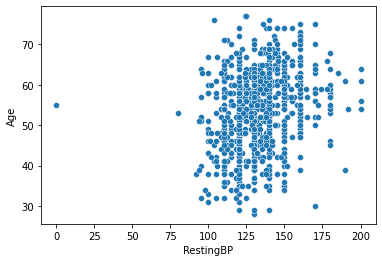

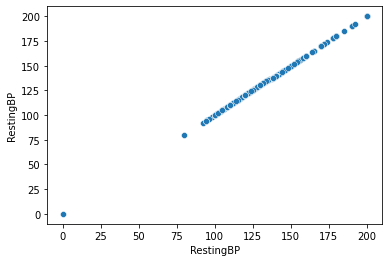

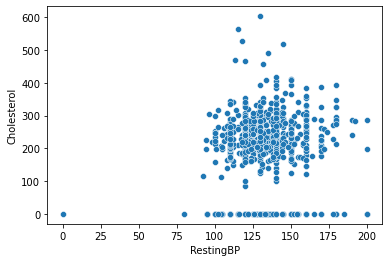

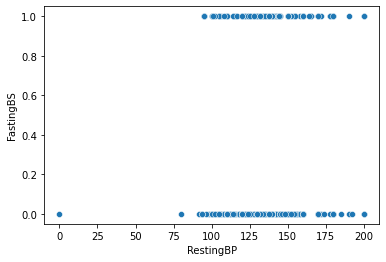

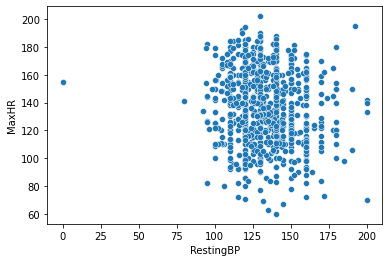

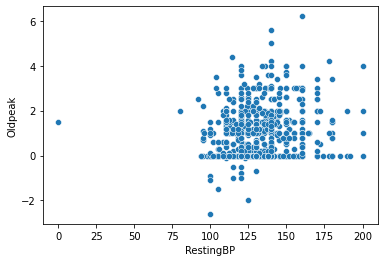

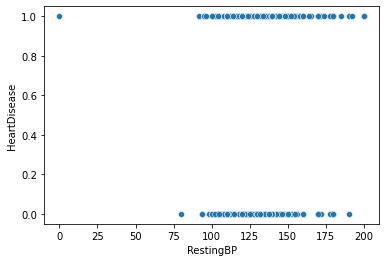

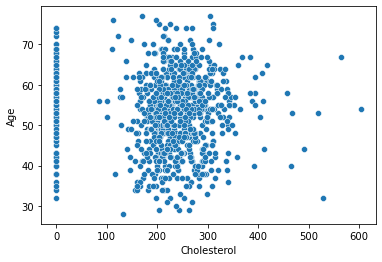

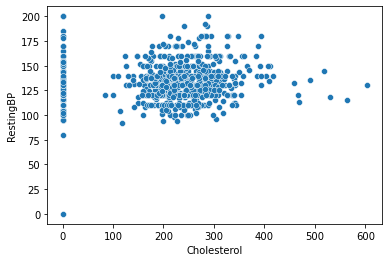

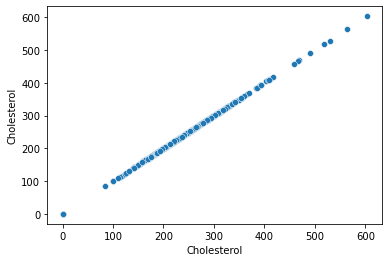

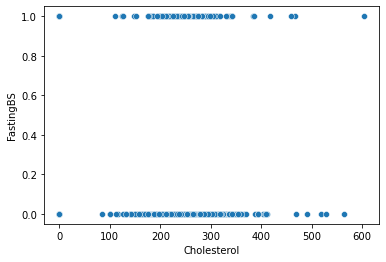

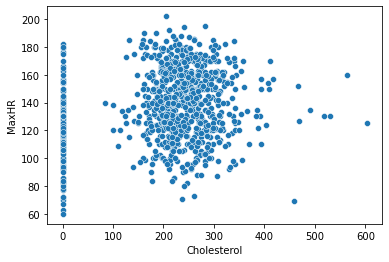

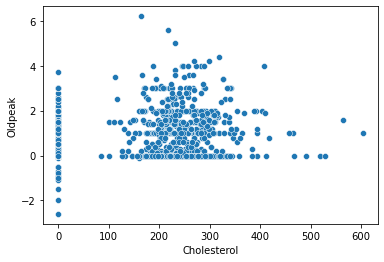

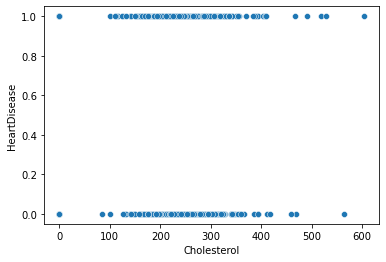

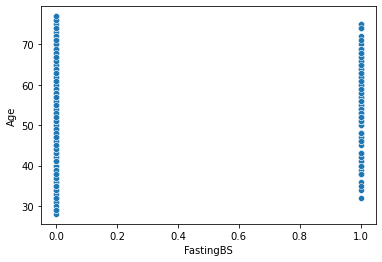

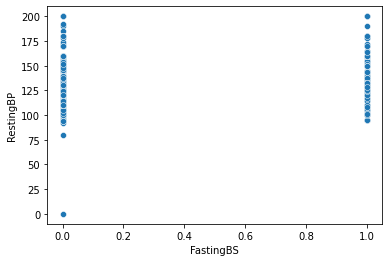

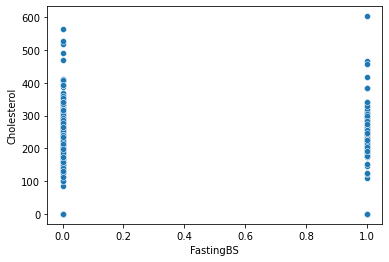

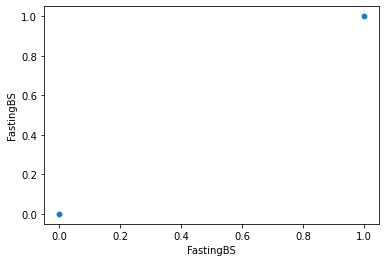

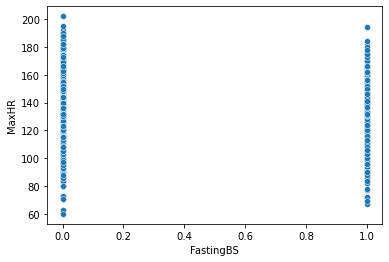

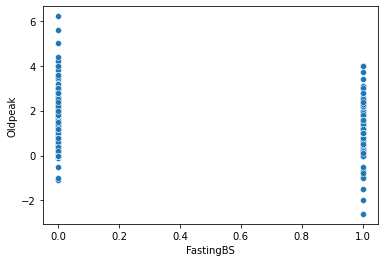

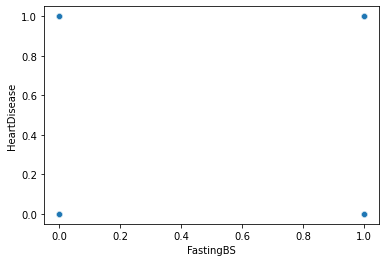

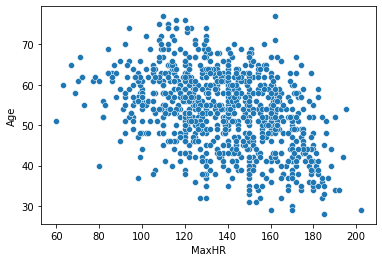

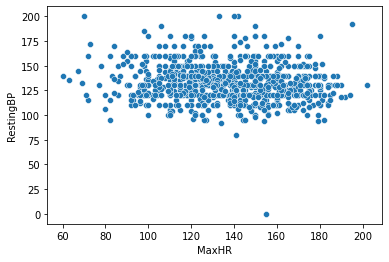

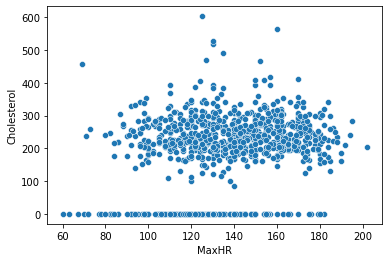

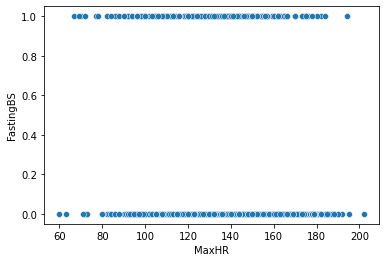

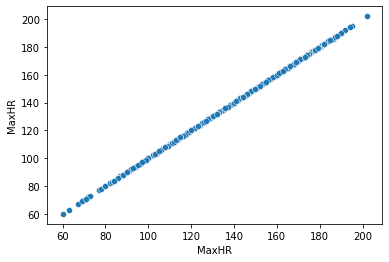

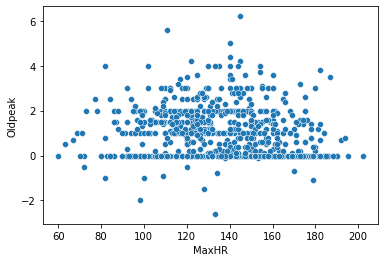

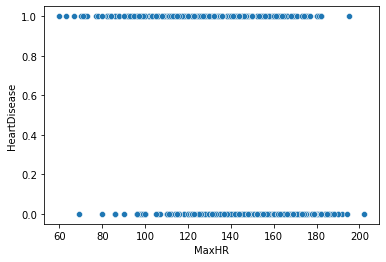

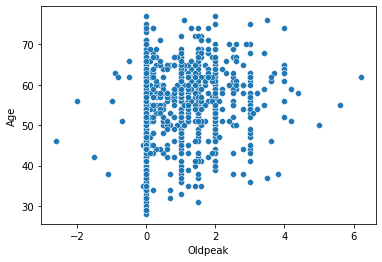

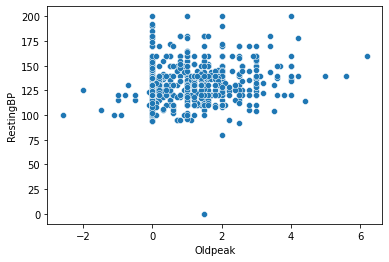

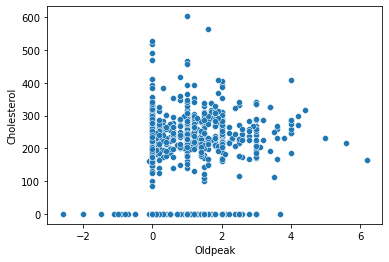

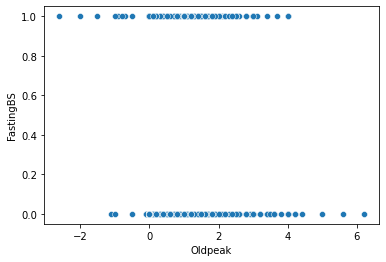

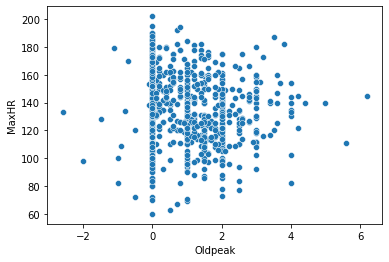

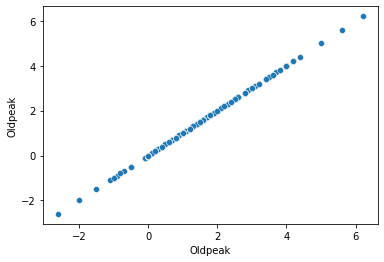

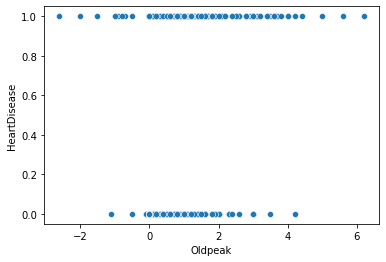

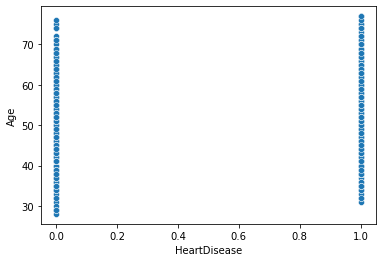

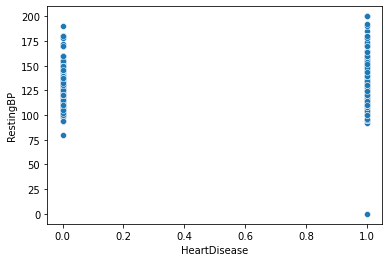

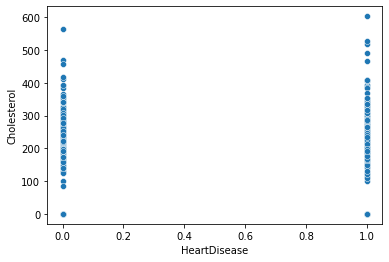

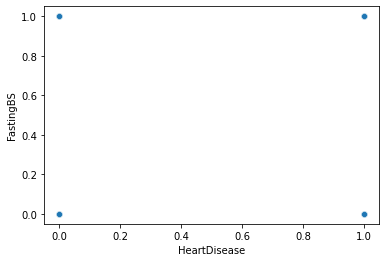

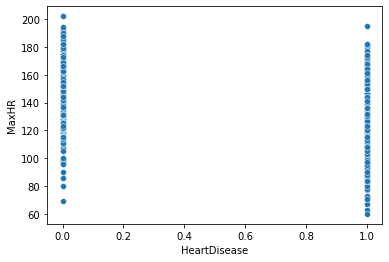

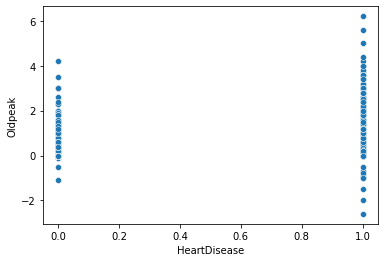

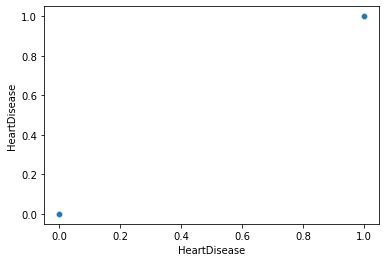

In [20]:
for i in data_N.columns:
    for j in data_N.columns:
        sns.scatterplot(x=data_N[i],y=data_N[j])
        plt.show()

In [21]:
data_C

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


# Numerical and Categorical Analysis

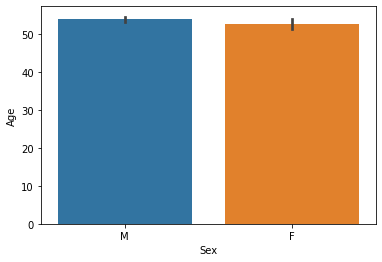

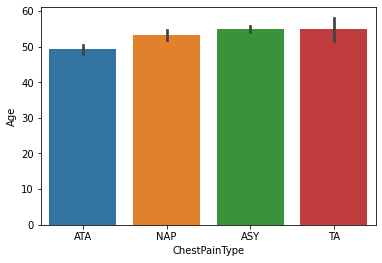

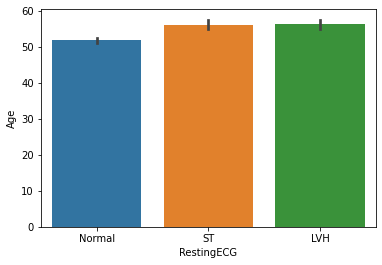

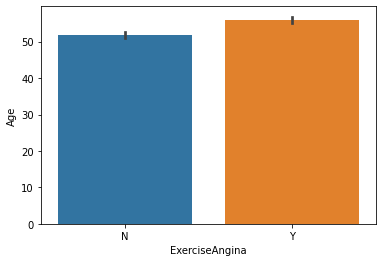

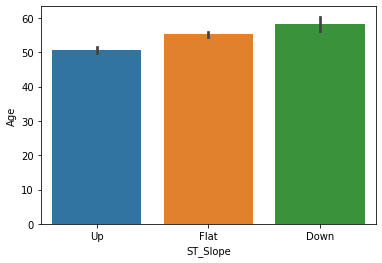

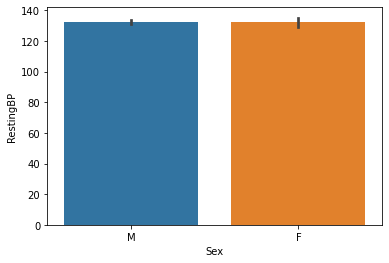

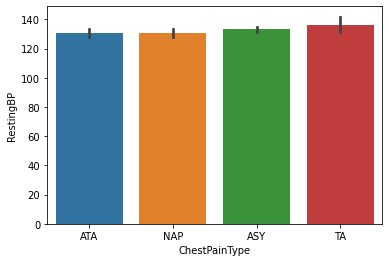

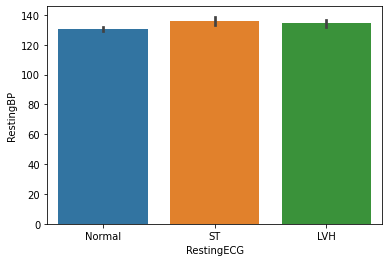

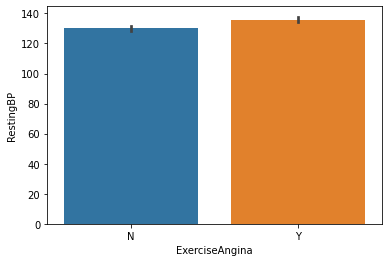

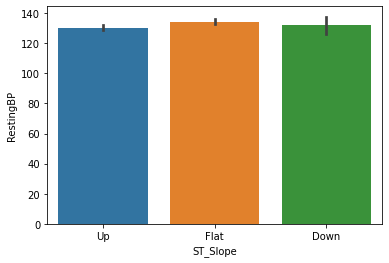

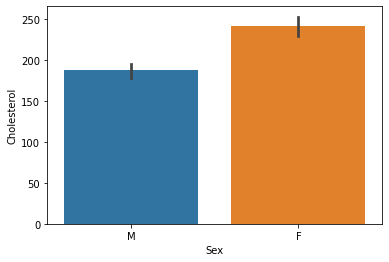

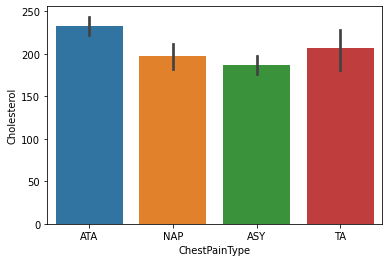

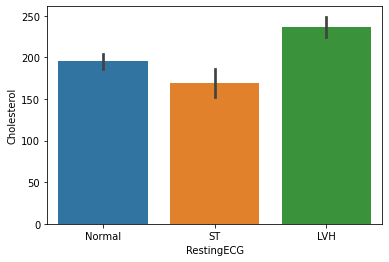

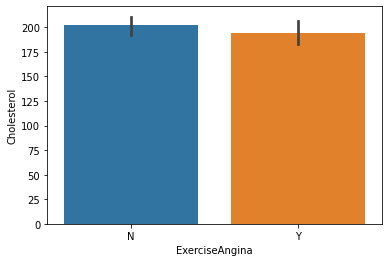

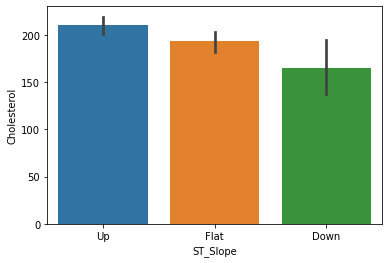

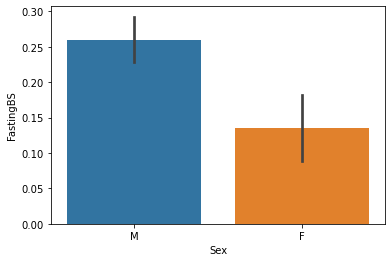

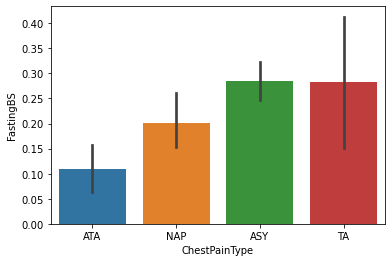

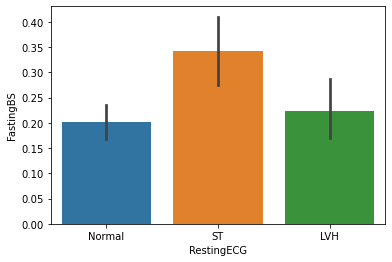

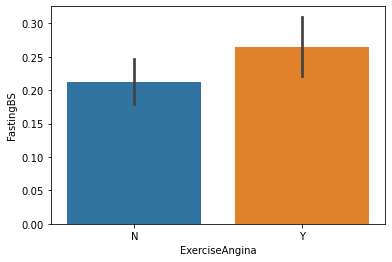

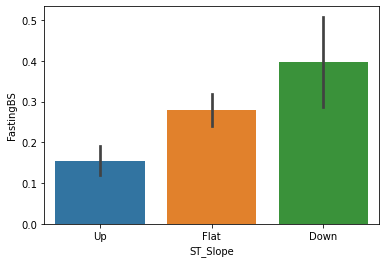

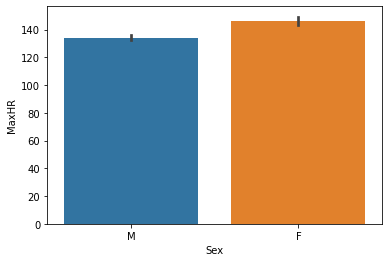

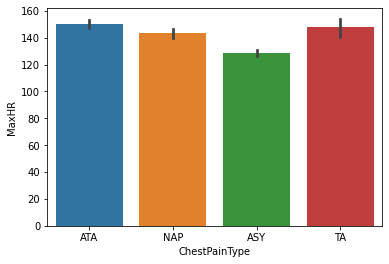

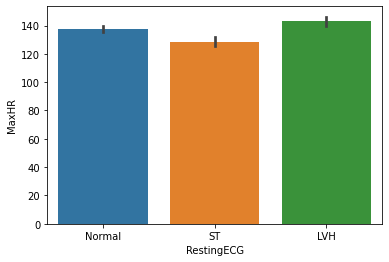

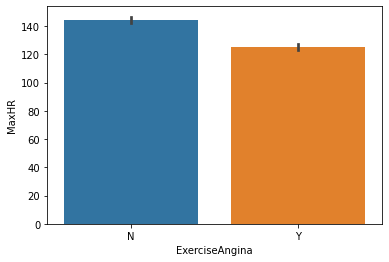

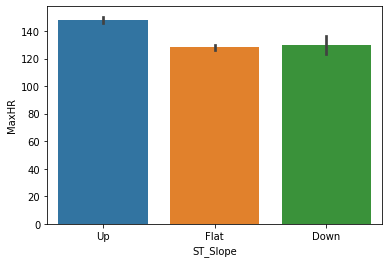

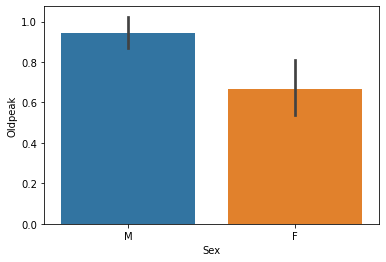

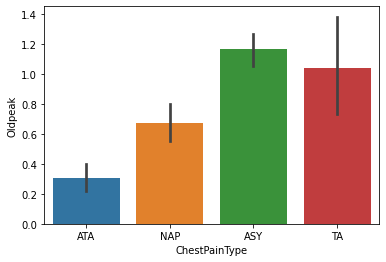

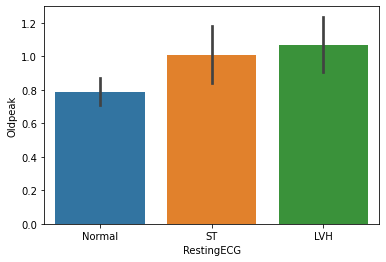

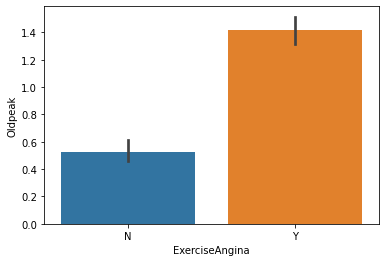

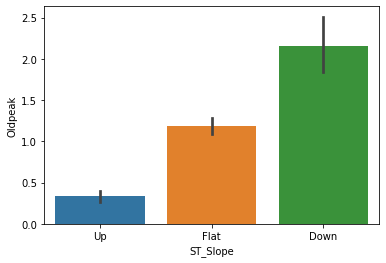

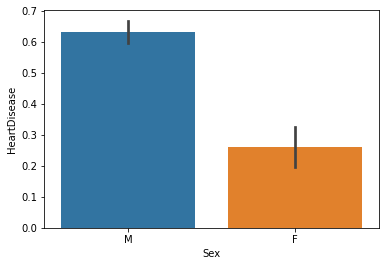

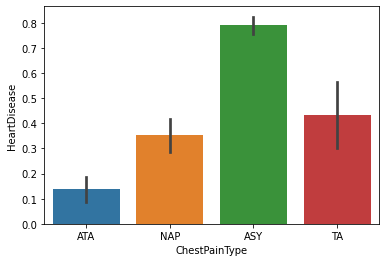

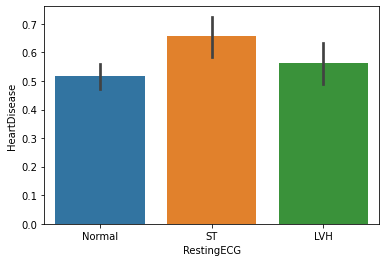

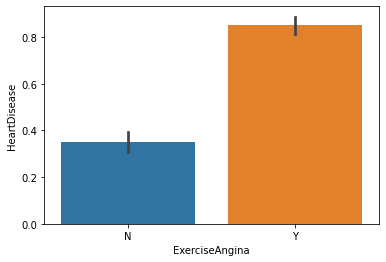

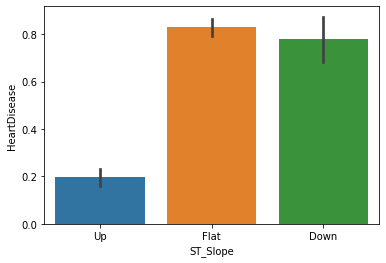

In [22]:
for i in data_N.columns:
    for j in data_C.columns:
        sns.barplot(y=data_N[i],x=data_C[j])
        plt.show()

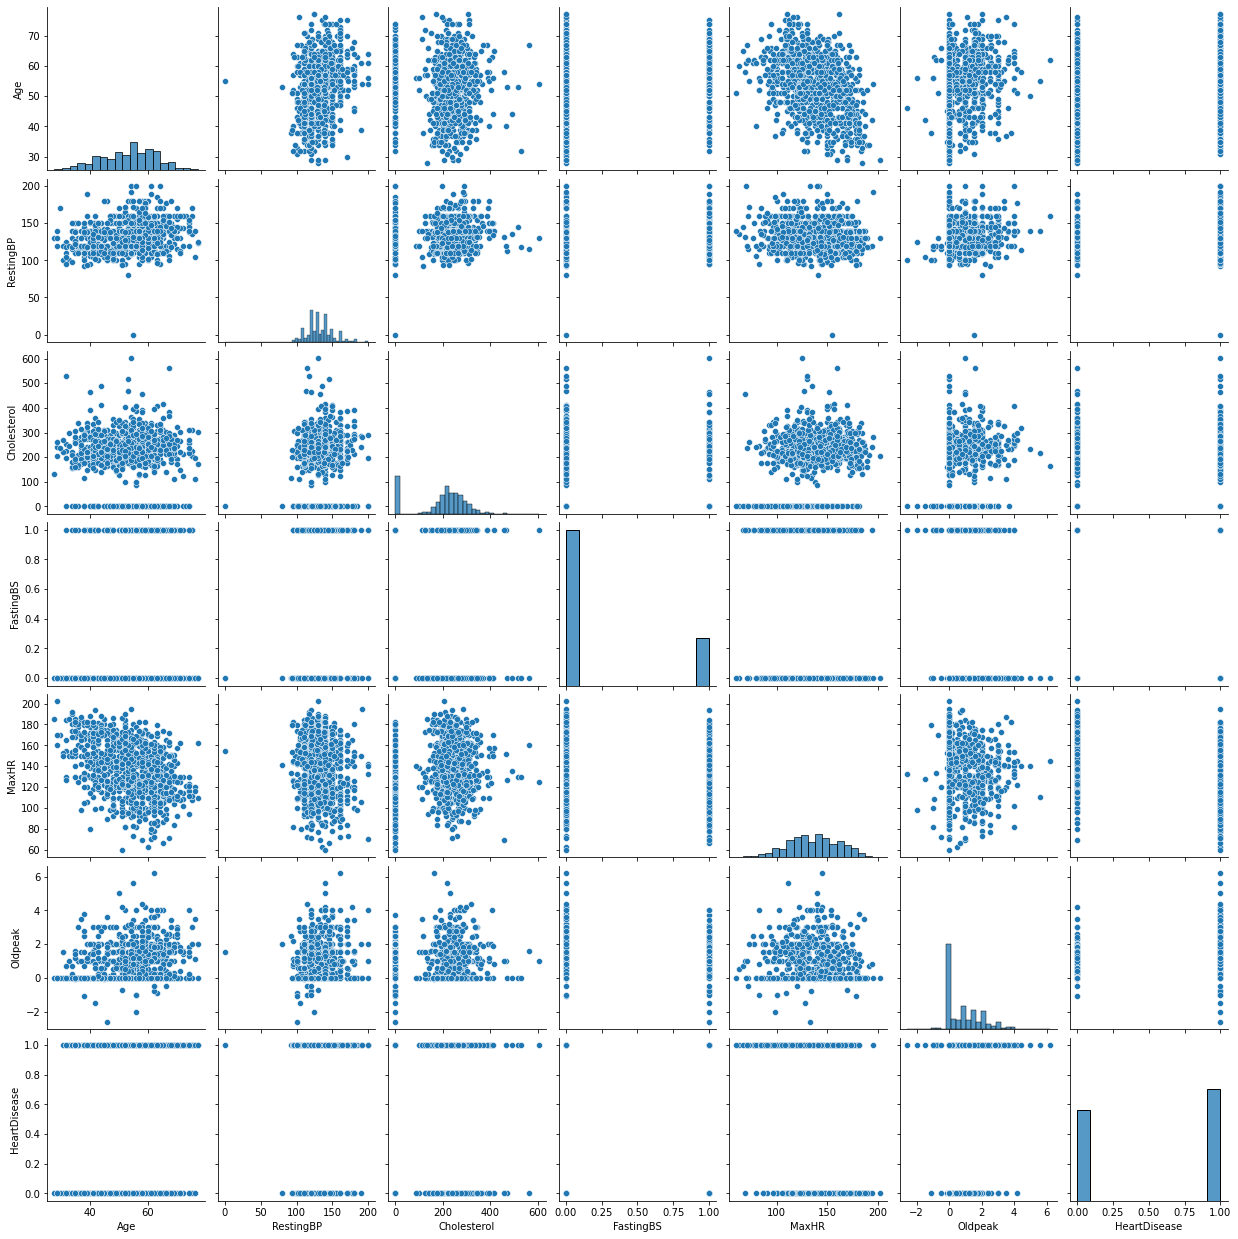

In [23]:
sns.pairplot(data)
            

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

### outlier treatment
### Inter Quantile range method


In [25]:
# calculate the first quartile
Q1 = data.quantile(0.25)

# calculate the third quartile
Q3 = data.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
data.shape

(588, 12)

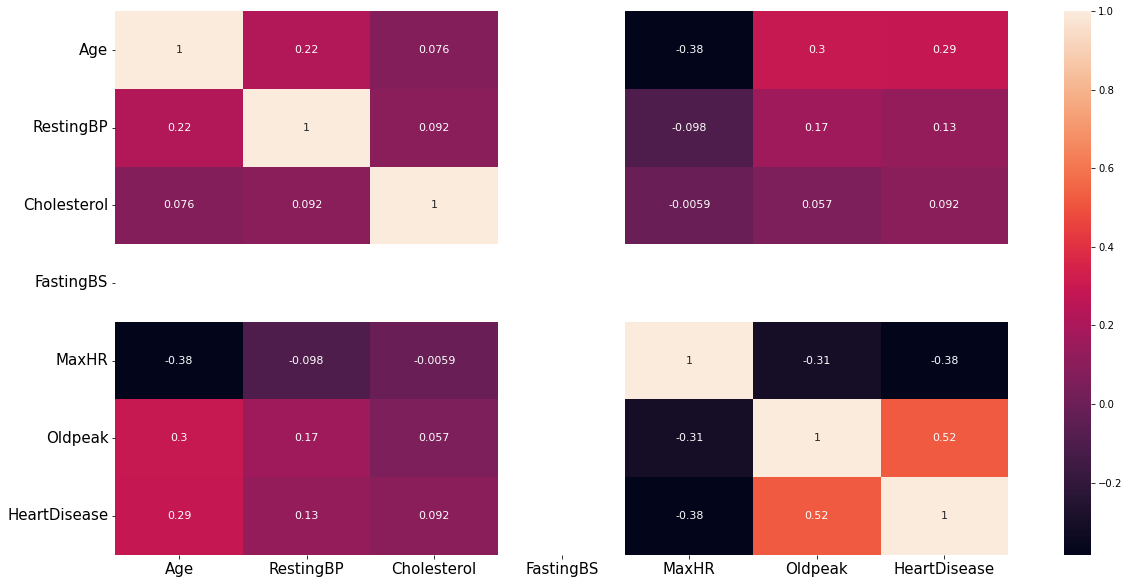

In [26]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: used to set the font size of the annotation
sns.heatmap(data.corr(), annot = True, annot_kws = {"size": 11})

# rotation = 'horizontal' rotates the y-axis labels horizontally
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

In [27]:
data["FastingBS"].unique()

array([0], dtype=int64)

In [28]:
data.drop("FastingBS",axis=1,inplace=True)
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,Normal,132,N,1.2,Flat,1
915,57,M,ASY,130,131,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,LVH,174,N,0.0,Flat,1


In [29]:
data_N= data.select_dtypes(include=np.number)
data_N

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,40,140,289,172,0.0,0
1,49,160,180,156,1.0,1
2,37,130,283,98,0.0,0
3,48,138,214,108,1.5,1
4,54,150,195,122,0.0,0
...,...,...,...,...,...,...
912,57,140,241,123,0.2,1
913,45,110,264,132,1.2,1
915,57,130,131,115,1.2,1
916,57,130,236,174,0.0,1


In [30]:
data_C= data.select_dtypes(exclude=np.number)
data_C.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


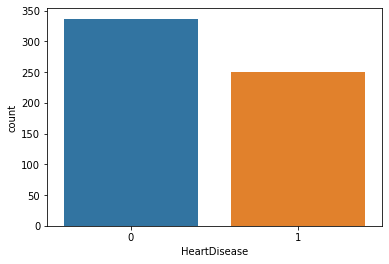

In [31]:
sns.countplot(data["HeartDisease"])
plt.show()

In [32]:
#Dummy encoding 
dummy_var= pd.get_dummies(data=data_C, drop_first=True)

In [33]:
dummy_var.head()

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,1,1,0,0,1,0,0,0,1
1,0,0,1,0,1,0,0,1,0
2,1,1,0,0,0,1,0,0,1
3,0,0,0,0,1,0,1,1,0
4,1,0,1,0,1,0,0,0,1


In [34]:
Y=data["HeartDisease"]

In [35]:
data_N.drop("HeartDisease",axis=1,inplace=True)

In [36]:
concat=pd.concat([data_N,dummy_var],axis=1)

In [37]:
concat.shape

(588, 14)

In [38]:
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [39]:
# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
concat = sm.add_constant(concat)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, Y_train, Y_test = train_test_split(concat, Y, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', Y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', Y_test.shape)

X_train (411, 15)
y_train (411,)
X_test (177, 15)
y_test (177,)


In [40]:

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [41]:
X_train.head()

,const,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
889,1.0,59,134,204,162,0.8,1,0,0,1,1,0,0,0,1
756,1.0,59,138,271,182,0.0,1,0,0,0,0,0,0,0,1
851,1.0,53,138,234,160,0.0,0,0,0,0,0,0,0,0,1
805,1.0,54,140,239,160,1.2,1,0,0,0,1,0,0,0,1
118,1.0,35,120,160,185,0.0,0,0,0,1,0,1,0,0,1


In [42]:
logreg = sm.Logit(Y_train, X_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.293172
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                  411
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                           14
Date:                Tue, 20 Dec 2022   Pseudo R-squ.:                  0.5697
Time:                        12:12:29   Log-Likelihood:                -120.49
converged:                       True   LL-Null:                       -280.04
Covariance Type:            nonrobust   LLR p-value:                 1.225e-59
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.2348      2.700     -2.309      0.021     -11.526      -0.943
Age     

In [43]:
#AIC stands for Akaike information criterion
print("AIC", logreg.aic)

AIC 270.98762584691167


In [44]:
df_odds=pd.DataFrame(np.exp(logreg.params),columns=["odds"])

In [45]:
df_odds

,odds
const,0.001960
Age,1.043513
RestingBP,1.020076
Cholesterol,1.006763
MaxHR,0.999911
Oldpeak,0.973303
Sex_M,6.343193
ChestPainType_ATA,0.088224
ChestPainType_NAP,0.302123
ChestPainType_TA,0.269582


In [46]:
y_predicted=logreg.predict(X_test)

In [47]:
y_predicted

821    0.018718
886    0.084844
23     0.642760
877    0.482129
101    0.157975
         ...   
419    0.460540
694    0.023397
161    0.914092
181    0.021830
16     0.601975
Length: 177, dtype: float64

In [48]:
y_pred=[0 if x<0.5 else 1 for x in y_predicted]

In [49]:
y_pred[:5]

[0, 0, 1, 0, 0]

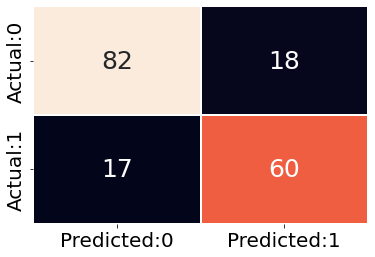

In [50]:
#Performance metrics of classification report
#Confusion matrix

# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(Y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [51]:
#TN= True Negatives 
#Actual 0 value which are classified correctly
TN= cm[0,0]

#TP= True Postives
#Actual 1 value which are classified correctly
TP= cm[1,1]

#FP=False Postive  type 1 error
#Actual 0 value which are classified wrongly as 1
FP= cm[0,1]
 
#FN =FAlse Negative  type 2 error
#Actual 1 value which are classified wrongly as 0
FN=cm[1,0]

In [52]:
precision= TP/(TP+FP)
precision

0.7692307692307693

In [53]:
recall=TP/(TP+FN)
recall

0.7792207792207793

In [54]:
## specificity
specificity= TN/(TN+FP)
specificity

0.82

In [55]:
f1_score= 2*((precision * recall)/(precision + recall ))
f1_score

0.7741935483870968

In [56]:
accuracy= (TN+TP) / (TN+FP+FN+TP)
accuracy

0.8022598870056498

In [57]:
acc_table = classification_report(Y_test, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       100
           1       0.77      0.78      0.77        77

    accuracy                           0.80       177
   macro avg       0.80      0.80      0.80       177
weighted avg       0.80      0.80      0.80       177



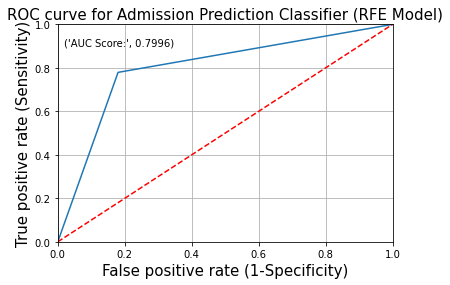

In [58]:
 #the roc_curve() recevier operating curve returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (RFE Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pred),4)))
                               
# plot the grid
plt.grid(True)

Youden table

In [59]:

# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()


,TPR,FPR,Threshold,Difference
0,0.779221,0.18,1,0.599221
1,0.000000,0.00,2,0.000000
2,1.000000,1.00,0,0.000000


## KNN 

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn_classification=KNeighborsClassifier(n_neighbors =3)
knn_model= knn_classification.fit(X_train,Y_train)

In [62]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model, test_data):
    
    # predict the target values using X_test
    y_pred = model.predict(test_data)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(Y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [63]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

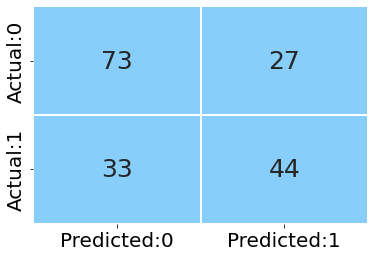

In [64]:
plot_confusion_matrix(knn_model, test_data=X_test)

In [65]:

# create a generalized function to calculate the performance metrics values for test set
def get_test_report(model, test_data):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(test_data)

    # return the classification report for test data
    return(classification_report(Y_test, test_pred))

In [66]:
test_report = get_test_report(knn_model, test_data=X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.69      0.73      0.71       100
           1       0.62      0.57      0.59        77

    accuracy                           0.66       177
   macro avg       0.65      0.65      0.65       177
weighted avg       0.66      0.66      0.66       177



In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [68]:
X_norm = MinMaxScaler()

# normalize all the numerical columns
# normalize all the columns of the dataframe 'df_feature'
num_norm = X_norm.fit_transform(data_N)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
X = pd.DataFrame(num_norm, columns = data_N.columns)

X.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,0.244898,0.615385,0.639498,0.770992,0.027027
1,0.428571,0.871795,0.297806,0.648855,0.297297
2,0.183673,0.487179,0.620690,0.206107,0.027027
3,0.408163,0.589744,0.404389,0.282443,0.432432
4,0.530612,0.743590,0.344828,0.389313,0.027027


### Train - Test split

In [69]:
X_train_norm, X_test_norm, y_train,y_test= train_test_split(X, Y, random_state=10, test_size=0.2)
print("X_train_norm",X_train_norm.shape)
print("y_train",y_train.shape)
print("X_test_norm",X_test_norm.shape)
print("y_test",y_test.shape)

X_train_norm (470, 5)
y_train (470,)
X_test_norm (118, 5)
y_test (118,)


Build a Knn model on a training dataset using eucliedean distance (Standardized data)

In [70]:
#n_neighbors: number of neighbors to consider
knn_classification=KNeighborsClassifier(n_neighbors =3)
knn_model= knn_classification.fit(X_train_norm,y_train)

In [71]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model, test_data):
    
    # predict the target values using X_test
    y_pred = model.predict(test_data)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

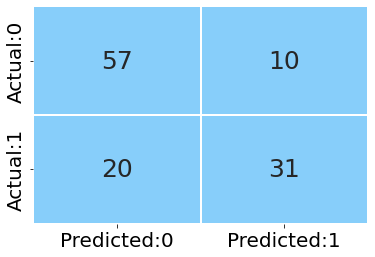

In [72]:
plot_confusion_matrix(knn_model, X_test_norm)

In [73]:
# Calculate performance measures on the test set.

In [74]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report(model, test_data):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(test_data)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

In [75]:
test_report = get_test_report(knn_model, X_test_norm)
print(test_report)

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        67
           1       0.76      0.61      0.67        51

    accuracy                           0.75       118
   macro avg       0.75      0.73      0.73       118
weighted avg       0.75      0.75      0.74       118



In [76]:
#plot the ROC curve.

In [77]:
def plot_roc(model, test_data):
    y_pred = model.predict(test_data)[:,-1]

#Optimal Value of K (using GridSearchCV) 

In [79]:
tuned_parameters={"n_neighbors":np.arange(1,25,2),
                 "metric":["hamming","euclidean","manhattan","Chebyshev"]}

knn_classification = KNeighborsClassifier()


knn_grid = GridSearchCV(estimator = knn_classification,
                       param_grid = tuned_parameters,
                       cv=5,
                       scoring="accuracy")
knn_grid.fit(X_train_norm, y_train)


print("Best paramters for KNN Classifier: ", knn_grid.best_params_, '\n')

Best paramters for KNN Classifier:  {'metric': 'euclidean', 'n_neighbors': 17} 



In [82]:
from sklearn.model_selection import cross_val_score

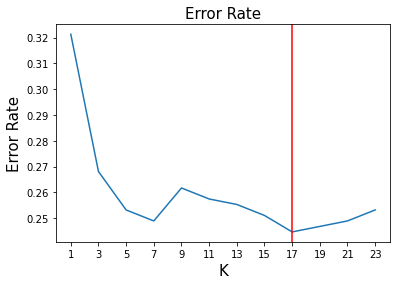

In [81]:
# consider an empty list to store error rate
error_rate = []

# use for loop to build a knn model for each K
for i in np.arange(1,25,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, metric = 'euclidean')
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn, X_train_norm, y_train, cv = 5)
    
    # calculate the mean score
    score = score.mean()
    
    # compute error rate 
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(1,25,2), error_rate)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 25, step = 2))

# plot a vertical line across the minimum error rate
plt.axvline(x = 17, color = 'red')

# display the plot
plt.show()



### optimal value of K = 17  obtained from the GridSearch(CV) results in a lowest error rate

#### Calculate performance measures on the test set


In [86]:
print('Classification Report for test set: \n', get_test_report(knn_grid, test_data=X_test_norm))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.79      0.88      0.83        67
           1       0.81      0.69      0.74        51

    accuracy                           0.80       118
   macro avg       0.80      0.78      0.79       118
weighted avg       0.80      0.80      0.79       118



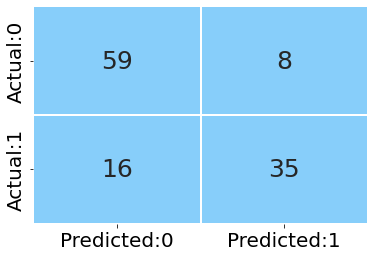

In [84]:
plot_confusion_matrix(knn_model, X_test_norm)

In [85]:
test_report = get_test_report(knn_model, X_test_norm)
print(test_report)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        67
           1       0.81      0.69      0.74        51

    accuracy                           0.80       118
   macro avg       0.80      0.78      0.79       118
weighted avg       0.80      0.80      0.79       118



## Naive Bayes Algorithm

In [ ]:
#build a naive bayes model on a training dataset

In [88]:
from sklearn.naive_bayes import GaussianNB

In [89]:
gnb = GaussianNB()

gnb_model = gnb.fit(X_train_norm, y_train)

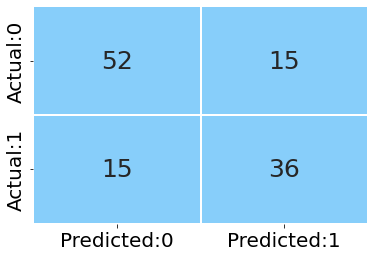

In [90]:
plot_confusion_matrix(gnb_model, test_data=X_test_norm)

In [91]:
test_report = get_test_report(gnb_model, X_test_norm)
print(test_report)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        67
           1       0.71      0.71      0.71        51

    accuracy                           0.75       118
   macro avg       0.74      0.74      0.74       118
weighted avg       0.75      0.75      0.75       118



In [94]:
y_pred

[0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1]